In [119]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from ipywidgets import interact

from sklearn.cluster import KMeans 

In [90]:
data = pd.read_csv('data.csv')

In [7]:
print('Shape of the dataset: ', data.shape)

Shape of the dataset:  (2200, 8)


In [9]:
data.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [13]:
# Checking null values
data.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [14]:
data['label'].value_counts()

rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: label, dtype: int64

In [20]:
print('Average ratio of Nitrogen in the soil= ',data['N'].mean())
print('Average ratio of Phosphorous in the soil= ',data['P'].mean())
print('Average ratio of Potassium in the soil= ',data['K'].mean())
print('Average temp in Celsius = ',data['temperature'].mean())
print('Average relative humidity in % = ',data['humidity'].mean())
print('Average PH value of the soil = ',data['ph'].mean())
print('Average Rainfall in mm = ',data['rainfall'].mean())

Average ratio of Nitrogen in the soil=  50.551818181818184
Average ratio of Phosphorous in the soil=  53.36272727272727
Average ratio of Potassium in the soil=  48.14909090909091
Average temp in Celsius =  25.616243851779533
Average relative humidity in % =  71.48177921778648
Average PH value of the soil =  6.469480065256369
Average Rainfall in mm =  103.46365541576832


['rice',
 'maize',
 'jute',
 'cotton',
 'coconut',
 'papaya',
 'orange',
 'apple',
 'muskmelon',
 'watermelon',
 'grapes',
 'mango',
 'banana',
 'pomegranate',
 'lentil',
 'blackgram',
 'mungbean',
 'mothbeans',
 'pigeonpeas',
 'kidneybeans',
 'chickpea',
 'coffee']

In [36]:
@interact
def summary(crops = list(data['label'].value_counts().index)):
    x = data[data['label'] == crops]
    print("------------------")
    print('Average Nitrogen = ', x['N'].mean())
    print("------------------")
    print('Average Phosphorous = ',x['P'].mean())
    print("------------------")
    print('Average Potassium = ', x['K'].mean())
    print("------------------")
    print('Average Temperature =', x['temperature'].mean())
    print("------------------")
    print('Average Humidity = ', x['humidity'].mean())
    print("------------------")
    print('Average PH = ', x['ph'].mean())
    print("------------------")
    print('Average Rainfall = ', x['rainfall'].mean())

interactive(children=(Dropdown(description='crops', options=('rice', 'maize', 'jute', 'cotton', 'coconut', 'pa…

In [41]:
@interact
def summary(conditions = ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']):
    print('Average value for', conditions, 'is ', data[conditions].mean())
    print("------------------")
    print('Rice: ', data[data['label'] == 'rice'][conditions].mean())
    print("------------------")
    print('Black Grams: ', data[data['label'] == 'blackgram'][conditions].mean())
    print("------------------")
    print('Banana: ', data[data['label'] == 'banana'][conditions].mean())
    print("------------------")
    print('Jute: ', data[data['label'] == 'jute'][conditions].mean())
    print("------------------")
    print('Coconut: ', data[data['label'] == 'coconut'][conditions].mean())
    print("------------------")
    print('Apple: ', data[data['label'] == 'apple'][conditions].mean())
    print("------------------")
    print('Papaya: ', data[data['label'] == 'papaya'][conditions].mean())

interactive(children=(Dropdown(description='conditions', options=('N', 'P', 'K', 'temperature', 'humidity', 'p…

In [55]:
@interact
def compare(conditions = ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']):
    print('Crtops that require greater than Average', conditions)
    print(data[data[conditions] > data[conditions].mean()]['label'].unique())
    print('----------------------------------')
    print('Crtops that lesser greater than Average', conditions)
    print(data[data[conditions] < data[conditions].mean()]['label'].unique())

interactive(children=(Dropdown(description='conditions', options=('N', 'P', 'K', 'temperature', 'humidity', 'p…

/Users/kushiknaveen/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/kushiknaveen/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/kushiknaveen/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level func

AttributeError: module 'matplotlib.pyplot' has no attribute 'subtitle'

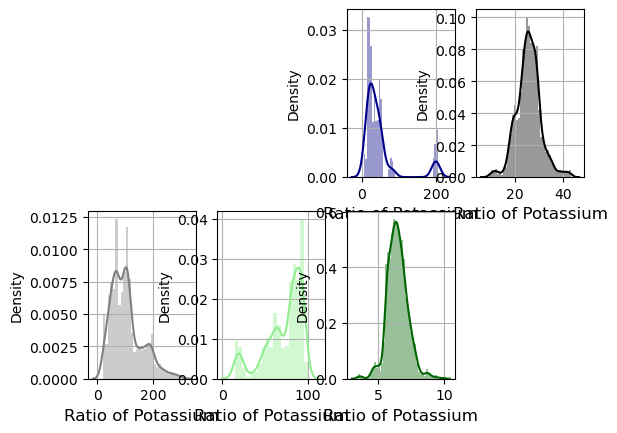

In [68]:
plt.subplot(2,4,3)
sns.distplot(data['K'], color = 'darkblue')
plt.xlabel('Ratio of Potassium', fontsize = 12)
plt.grid()

plt.subplot(2,4,4)
sns.distplot(data['temperature'], color = 'black')
plt.xlabel('Ratio of Potassium', fontsize = 12)
plt.grid()

plt.subplot(2,4,5)
sns.distplot(data['rainfall'], color = 'grey')
plt.xlabel('Ratio of Potassium', fontsize = 12)
plt.grid()

plt.subplot(2,4,6)
sns.distplot(data['humidity'], color = 'lightgreen')
plt.xlabel('Ratio of Potassium', fontsize = 12)
plt.grid()

plt.subplot(2,4,7)
sns.distplot(data['ph'], color = 'darkgreen')
plt.xlabel('Ratio of Potassium', fontsize = 12)
plt.grid()

plt.subtitle('Distirbution for Agricultural Conditions', fontsize = 20)
plt.show()

In [75]:
print('Interesting Observations:')
print('------------------------')
print("Crops which require very High Nitrogen content in Soil: ", data[data['N'] > 120]['label'].unique())
print("Crops which require very High Phosphorous content in Soil: ", data[data['P'] > 100]['label'].unique())
print("Crops which require very High K content in Soil: ", data[data['K'] > 200]['label'].unique())
print("Crops which require very High rainfall content in Soil: ", data[data['rainfall'] > 200]['label'].unique())
print("Crops which require very High temperature : ", data[data['temperature'] > 40]['label'].unique())

Interesting Observations:
------------------------
Crops which require very High Nitrogen content in Soil:  ['cotton']
Crops which require very High Phosphorous content in Soil:  ['grapes' 'apple']
Crops which require very High K content in Soil:  ['grapes' 'apple']
Crops which require very High rainfall content in Soil:  ['rice' 'papaya' 'coconut']
Crops which require very High temperature :  ['grapes' 'papaya']


In [77]:
print("Summer Crops")
print(data[(data['temperature'] > 30) & (data['humidity'] > 50)]['label'].unique()  )
print('----------------------')
print("Winter Crops")
print(data[(data['temperature'] < 20) & (data['humidity'] > 30)]['label'].unique()  )
print('----------------------')
print(data[(data['rainfall'] > 200) & (data['humidity'] > 30)]['label'].unique()  )

Summer Crops
['pigeonpeas' 'mothbeans' 'blackgram' 'mango' 'grapes' 'orange' 'papaya']
----------------------
Winter Crops
['maize' 'pigeonpeas' 'lentil' 'pomegranate' 'grapes' 'orange']
----------------------
['rice' 'papaya' 'coconut']


In [89]:
data

,N,P,K,temperature,humidity,ph,rainfall
0,90,42,43,20.879744,82.002744,6.502985,202.935536
1,85,58,41,21.770462,80.319644,7.038096,226.655537
2,60,55,44,23.004459,82.320763,7.840207,263.964248
3,74,35,40,26.491096,80.158363,6.980401,242.864034
4,78,42,42,20.130175,81.604873,7.628473,262.717340
...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507
2196,99,15,27,27.417112,56.636362,6.086922,127.924610
2197,118,33,30,24.131797,67.225123,6.362608,173.322839
2198,117,32,34,26.272418,52.127394,6.758793,127.175293


In [102]:
x = data.drop(['label'], axis=1)
x = x.values
print(x.shape)

(2200, 7)


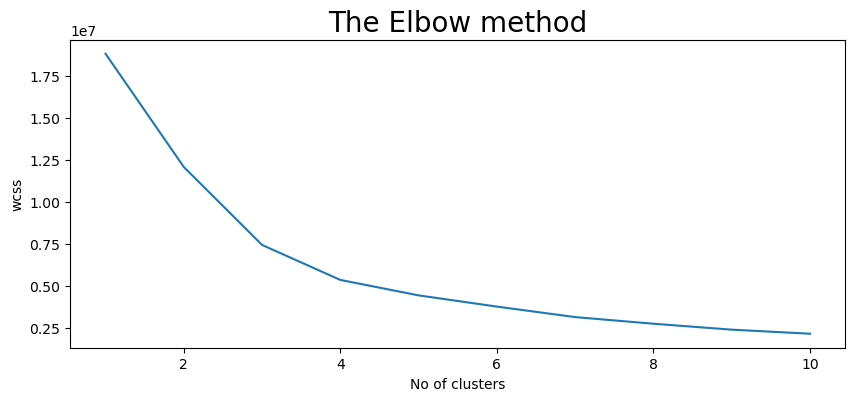

In [108]:
# Determining the optimal number of Clusters within the dataset

plt.rcParams['figure.figsize'] = (10,4)

wcss = []

for i in range(1,11):
    km = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    km.fit(x)
    wcss.append(km.inertia_)

# Plotting the result
plt.plot(range(1,11),wcss)
plt.title('The Elbow method', fontsize=20)
plt.xlabel('No of clusters')
plt.ylabel('wcss')
plt.show()

In [112]:
km = KMeans(n_clusters=4, init='k-means++', max_iter=300, n_init=10, random_state=0)
y_means = km.fit_predict(x)

# Results

a=data['label']
y_means = pd.DataFrame(y_means)
z = pd.concat([y_means, a], axis=1)
z=z.rename(columns={0: 'cluster'})

# Lets check the clusters of each crop
print('Crops in first cluster: ', z[z['cluster'] == 0]['label'].unique()) 
print('--------------------------------------------------')
print('Crops in second cluster: ', z[z['cluster'] == 1]['label'].unique())
print('--------------------------------------------------')
print('Crops in third cluster: ', z[z['cluster'] == 2]['label'].unique())
print('--------------------------------------------------')
print('Crops in fourth cluster: ', z[z['cluster'] == 3]['label'].unique())


Crops in first cluster:  ['maize' 'chickpea' 'kidneybeans' 'pigeonpeas' 'mothbeans' 'mungbean'
 'blackgram' 'lentil' 'pomegranate' 'mango' 'orange' 'papaya' 'coconut']
--------------------------------------------------
Crops in second cluster:  ['maize' 'banana' 'watermelon' 'muskmelon' 'papaya' 'cotton' 'coffee']
--------------------------------------------------
Crops in third cluster:  ['grapes' 'apple']
--------------------------------------------------
Crops in fourth cluster:  ['rice' 'pigeonpeas' 'papaya' 'coconut' 'jute' 'coffee']


In [114]:
y = data['label']
x = data.drop(['label'], axis=1)

print('Shape of x:', x.shape)
print('Shape of y:', y.shape)

Shape of x: (2200, 7)
Shape of y: (2200,)


In [115]:
# Creating the Training and testing Sets for Validation of Results

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

print('Shape of x train = ', x_train.shape)
print('Shape of x test = ', x_test.shape)
print('Shape of y train = ', x_train.shape)
print('Shape of y test = ', y_test.shape)

Shape of x train =  (1760, 7)
Shape of x test =  (440, 7)
Shape of y train =  (1760, 7)
Shape of y test =  (440,)


In [116]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

/Users/kushiknaveen/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


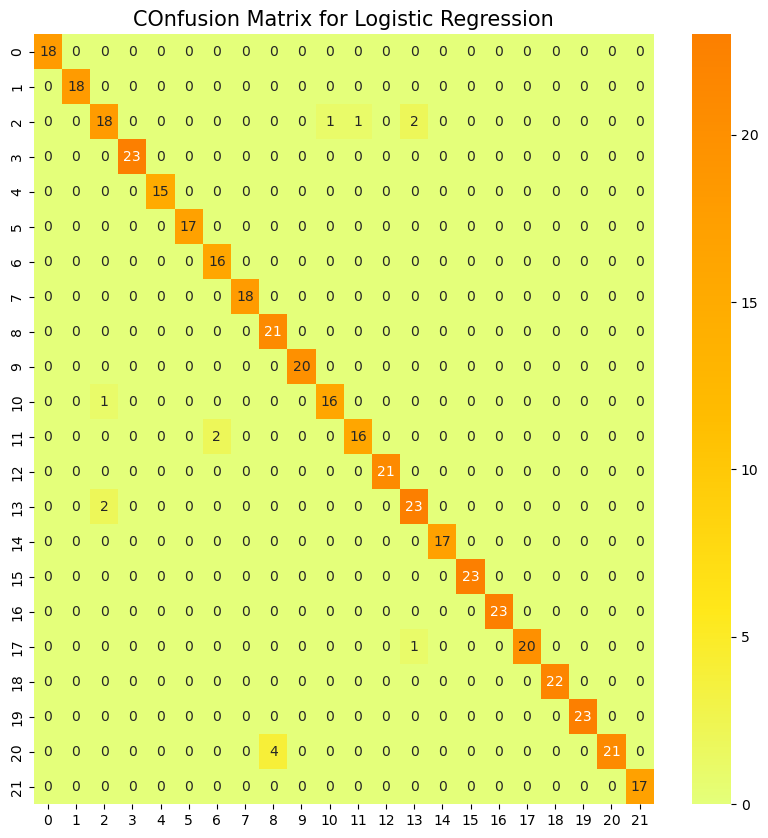

In [120]:
from sklearn.metrics import confusion_matrix

plt.rcParams['figure.figsize'] = (10,10)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot= True, cmap='Wistia')
plt.title('COnfusion Matrix for Logistic Regression', fontsize = 15)
plt.show()

In [122]:
from sklearn.metrics import classification_report
cr = classification_report(y_test, y_pred)
print(cr)

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        18
      banana       1.00      1.00      1.00        18
   blackgram       0.86      0.82      0.84        22
    chickpea       1.00      1.00      1.00        23
     coconut       1.00      1.00      1.00        15
      coffee       1.00      1.00      1.00        17
      cotton       0.89      1.00      0.94        16
      grapes       1.00      1.00      1.00        18
        jute       0.84      1.00      0.91        21
 kidneybeans       1.00      1.00      1.00        20
      lentil       0.94      0.94      0.94        17
       maize       0.94      0.89      0.91        18
       mango       1.00      1.00      1.00        21
   mothbeans       0.88      0.92      0.90        25
    mungbean       1.00      1.00      1.00        17
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00      1.00        23
      papaya       1.00    

In [123]:
data.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [126]:
prediction = model.predict((np.array([[90,40,40,20,80,7,200]])))
print("Suggested Crop for given Climatic conditions: ", prediction)

Suggested Crop for given Climatic conditions:  ['rice']


/Users/kushiknaveen/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
